# Classification on Custom Sensor Dataset

This notebook demonstrates how to:
- Load data from custom files: "dataset.txt", "features", and "targets"
- Perform exploratory data analysis and preprocessing
- Scale features and split data for training/testing
 - Train and evaluate four classifiers: SVM, Logistic Regression, Random Forest, and kNN

**Files Expected:**
 - dataset.txt: Contains the sensor readings, whitespace-delimited.
 - features: Contains feature indices and names (e.g., "1 tBodyAcc-mean()-X").
 - targets: Contains one target label per row.

In [ ]:
# Import required libraries
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

## 1. Data Loading

Read the feature matrix, feature names, and target labels from the provided files.


In [ ]:
import pandas as pd

# File paths for the dataset
dataset_file = 'dataset.txt'
features_file = 'features.txt'
targets_file = 'targets.txt'

# Load the feature data (assuming whitespace-delimited, no header)
X = pd.read_csv(dataset_file, delim_whitespace=True, header=None)
print("Dataset shape:", X.shape)

# Load feature names: assuming each line is like "1 tBodyAcc-mean()-X"
features_df = pd.read_csv(features_file, header=None, names=['index', 'feature'])
feature_names = features_df['feature'].tolist()

# Assign the feature names to X's columns (if they match in number)
if len(feature_names) == X.shape[1]:
    X.columns = feature_names
else:
    print("Warning: Number of feature names does not match the number of columns in dataset.")

# Load targets (labels)
y = pd.read_csv(targets_file, header=None, names=['target'])
print("Targets shape:", y.shape)

C:\Users\dvlas\AppData\Local\Temp\ipykernel_8544\3321124904.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(dataset_file, delim_whitespace=True, header=None)


Dataset shape: (10299, 561)
Targets shape: (10299, 1)


## 2. Exploratory Data Analysis (EDA)

Checking for missing values and examine the distribution of target classes.

In [ ]:
# Check for missing values in features and targets
print("Missing values in features:", X.isnull().sum().sum())
print("Missing values in targets:", y.isnull().sum().sum())

Missing values in features: 0
Missing values in targets: 0


In [9]:
# Display summary statistics of the features
X.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
NaN,10299.0,0.274347,0.067628,-1.0,0.262625,0.277174,0.288354,1.0
NaN,10299.0,-0.017743,0.037128,-1.0,-0.024902,-0.017162,-0.010625,1.0
NaN,10299.0,-0.108925,0.053033,-1.0,-0.121019,-0.108596,-0.097589,1.0
NaN,10299.0,-0.607784,0.438694,-1.0,-0.992360,-0.943030,-0.250293,1.0
NaN,10299.0,-0.510191,0.500240,-1.0,-0.976990,-0.835032,-0.057336,1.0


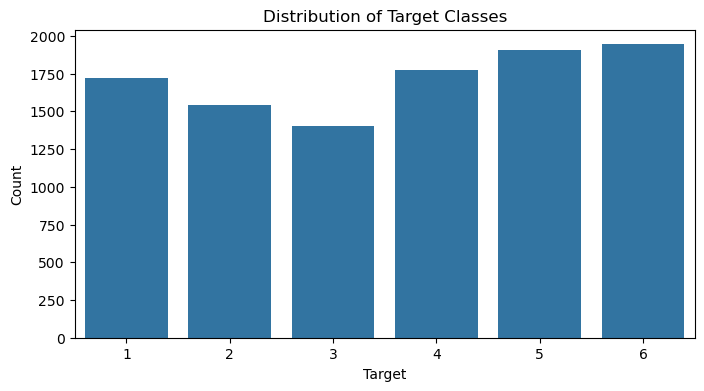

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target classes
plt.figure(figsize=(8, 4))
sns.countplot(x=y['target'])
plt.title('Distribution of Target Classes')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

## 3. Data Preprocessing

Standardize the features using StandardScaler.

In [20]:
# Convert all column names to strings
X.columns = X.columns.astype(str)

# Now initialize the scaler and scale the feature matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 4. Train/Test Split

Split the scaled data into training and test sets (80% train, 20% test).

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (8239, 561)
Test set shape: (2060, 561)


## 5. Model Training and Evaluation

Define a helper function to evaluate models with accuracy, classification report, and confusion matrix.

In [22]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluate the given model on the test data.
    """
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## 5.1 Support Vector Machine (SVM)

Using the RBF kernel and 5-fold cross-validation.

SVM Cross-Validation Accuracy: 0.9739
--- SVM ---
Accuracy: 0.9786

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       344
           2       0.99      0.99      0.99       309
           3       0.98      0.99      0.99       281
           4       0.94      0.96      0.95       356
           5       0.96      0.94      0.95       381
           6       1.00      0.99      1.00       389

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060



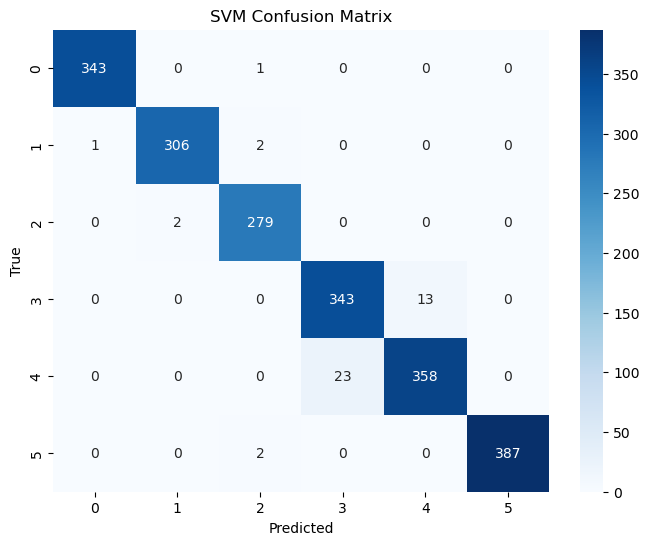

In [23]:
# Initialize SVM model with RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_cv_scores = cross_val_score(svm_model, X_train, y_train.values.ravel(), cv=5)
print("SVM Cross-Validation Accuracy: {:.4f}".format(svm_cv_scores.mean()))

# Train and evaluate on test data
svm_model.fit(X_train, y_train.values.ravel())
evaluate_model(svm_model, X_test, y_test.values.ravel(), "SVM")